In [15]:
import numpy as np
import pandas as pd
import sys
sys.path.append("C:\\Users\\mrbal\\Documents\\NLP\\RL\\basic_reinforcement_learning")
import NLP_utils.preprocessing as nlp_processing

# read the data
train_data = pd.read_csv("rt-polarity-train.csv")
# process the data by removing special characters, large spaces, etc.
train_data = nlp_processing.process_df_texts(train_data, ["review"])
train_data.head()

,Unnamed: 0,label,review
0,5829,1,does what fine documentary does best it extend...
1,3209,0,it drowns in sap
2,4323,0,the scriptwriters are no less menace to societ...
3,281,0,there an excellent minute film here unfortunat...
4,100,0,narratively trouble every day is plodding mess


In [18]:
# access the 'text' column and print the first few values
text_column = train_data["review"]
label_column = train_data["label"]

# compute basic statistics on the text column, such as the mean and standard deviation of the character length of the sentences 
text_lengths = [len(sentence) for sentence in text_column]
mean_length = sum(text_lengths) / len(text_lengths)
std_length = (sum((length - mean_length) ** 2 for length in text_lengths) / len(text_lengths)) ** 0.5
print('Mean sentence length by character:', mean_length)
print('Standard deviation of sentence length by character:', std_length)

# use the NLTK library to perform more advanced text analysis, such as part-of-speech tagging and sentiment analysis
import nltk

# download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# create a function that takes a sentence as input and returns its part-of-speech tags
def pos_tag_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)
    return tags

# apply the function to each sentence in the text column and print the resulting tags for the first few sentences
pos_tags = text_column.apply(pos_tag_sentence)
print(pos_tags.head())

# create a function that takes a sentence as input and returns its sentiment score
def sentiment_score(sentence):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(sentence)
    return sentiment['compound']

# apply the function to each sentence in the text column and print the resulting sentiment scores for the first few sentences
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_scores = text_column.apply(sentiment_score)
print(sentiment_scores.head())


Mean sentence length by character: 107.45567542213884
Standard deviation of sentence length by character: 48.76540412484422


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mrbal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mrbal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0    [(does, VBZ), (what, WP), (fine, VB), (documen...
1      [(it, PRP), (drowns, VBZ), (in, IN), (sap, NN)]
2    [(the, DT), (scriptwriters, NNS), (are, VBP), ...
3    [(there, EX), (an, DT), (excellent, JJ), (minu...
4    [(narratively, RB), (trouble, NN), (every, DT)...
Name: review, dtype: object
0    0.8126
1   -0.4939
2   -0.6258
3    0.3182
4   -0.6369
Name: review, dtype: float64


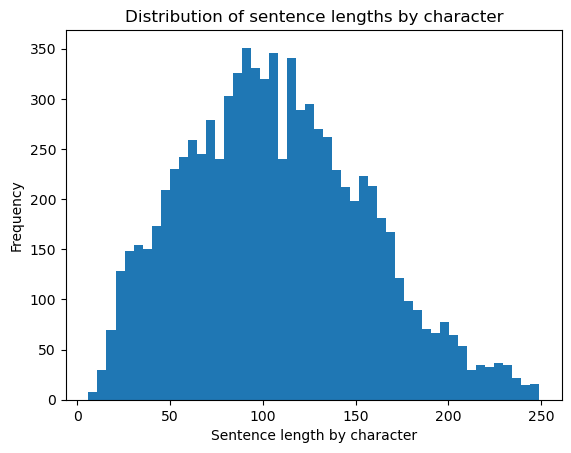

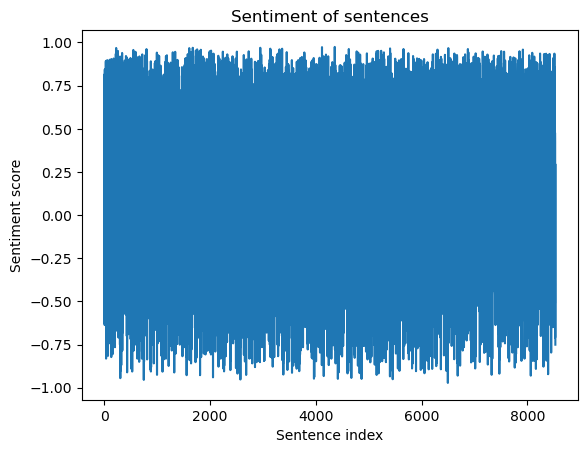

In [19]:
import matplotlib.pyplot as plt

# plot the distribution of sentence lengths using a histogram
plt.hist(text_lengths, bins=50)
plt.xlabel('Sentence length by character')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths by character')
plt.show()

# plot the sentiment scores of the sentences using a scatter plot
plt.plot(range(len(sentiment_scores)), sentiment_scores)
plt.xlabel('Sentence index')
plt.ylabel('Sentiment score')
plt.title('Sentiment of sentences')
plt.show()


In [21]:
word_counts = [len(sentence.split()) for sentence in text_column]
mean_word_count = sum(word_counts) / len(word_counts)
std_word_count = (sum((count - mean_word_count) ** 2 for count in word_counts) / len(word_counts)) ** 0.5

print('Mean sentence length:', mean_word_count)
print('Standard deviation of sentence length:', std_word_count)
print(f'Maximum sentence length: {max(word_counts)}, minimum_sentence length: {min(word_counts)}')

Mean sentence length: 18.223733583489683
Standard deviation of sentence length: 8.463551116700794
Maximum sentence length: 50, minimum_sentence length: 1


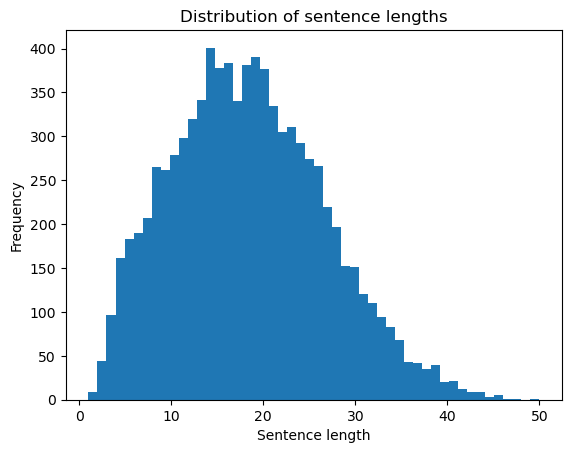

In [22]:
# plot the distribution of sentence lengths using a histogram
plt.hist(word_counts, bins=50)
plt.xlabel('Sentence length')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths')
plt.show()

In [43]:
label_counts = dict(label_column.value_counts())
label_counts.values()

dict_values([4275, 4253])

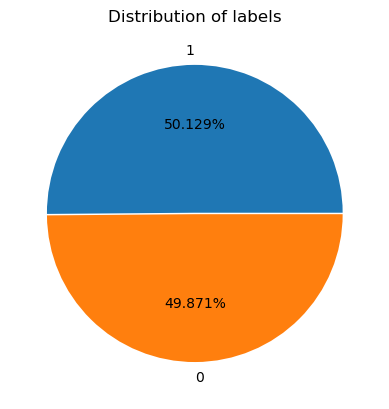

In [58]:
# plot the distribution of sentence lengths using a histogram
plt.pie(list(label_counts.values()), labels=list(label_counts.keys()), explode=[0.01, 0], autopct='%.3f%%')
plt.title("Distribution of labels")
plt.show()